# Pandas Basics

### Import Pandas

In [68]:
import pandas as pd

Create DataFrame, skip the first 20 rows and tell pandas which column represents the date

In [69]:
df = pd.read_csv('data_small/TG_STAID000001.txt', skiprows=20, parse_dates=['    DATE'])

In [70]:
df.head()

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0


### Show certain rows

In [71]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


### See all the columns

In [72]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

### See one column

In [73]:
df['   TG']

0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64

To return more than one column you need to use double brackets [[ ]]

In [74]:
df[['    DATE','   TG']]

,DATE,TG
0,1860-01-01,21
1,1860-01-02,46
2,1860-01-03,31
3,1860-01-04,37
4,1860-01-05,31
...,...,...
59316,2022-05-27,-9999
59317,2022-05-28,-9999
59318,2022-05-29,-9999
59319,2022-05-30,-9999


** The above explores the data, but doesn't change the DataFrame

## Simple stats 

### Get the mean temp

In [75]:
df['   TG'].mean()

-991.1500649011311

* This is not correct, there are -9999 values in the data, which is not correct, we need to filter

### Get DataFrame where the column is not equal to -9999

This will return the DataFrame without the -9999 values

In [76]:
df.loc[df['   TG'] != -9999]

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
53655,1,35381,2006-11-26,80,0
53656,1,35381,2006-11-27,70,0
53657,1,35381,2006-11-28,71,0
53658,1,35381,2006-11-29,63,0


Now to apply the mean, return the dataframe, then return only the column that is of interest, and get the mean
Divide by 10 as the dataset requires

In [77]:
df.loc[df['   TG'] != -9999]['   TG'].mean()/10

6.360787526128467

### Get the max temperature

In [78]:
df.loc[df['   TG'] != -9999]['   TG'].max()/10

26.2

### Get the min temperature

In [79]:
df.loc[df['   TG'] != -9999]['   TG'].min()/10

-28.8

### Create a histogram

This will show the distribution of the temperature, the more occurances of a temperature, the higher the graph on the y-axis

<Axes: >

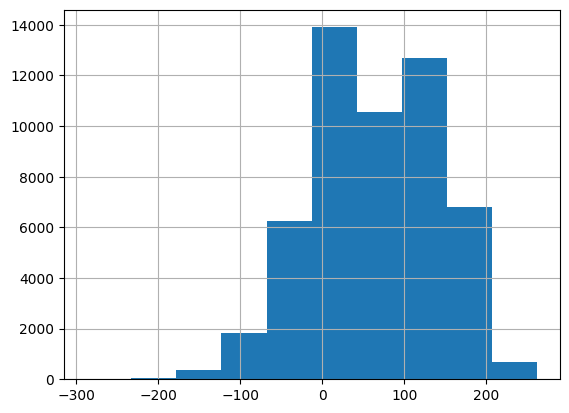

In [80]:
df.loc[df['   TG'] != -9999]['   TG'].hist()

### Get certain cell values

In [81]:
df.head()

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0


In [82]:
df.loc[df['    DATE']=='1860-01-04']

,STAID,SOUID,DATE,TG,Q_TG
3,1,35381,1860-01-04,37,0


### Get the temperature for 1860-01-04

In [83]:
df.loc[df['    DATE']=='1860-01-04']['   TG'].squeeze()/10

3.7

### Get entire row when temperature what the highest

In [84]:
df.loc[df['   TG'] == df['   TG'].max()]

,STAID,SOUID,DATE,TG,Q_TG
3150,1,35381,1868-08-16,262,0


### Get only the temperature for the row where the temperature was the highest

In [85]:
df.loc[df['   TG'] == df['   TG'].max()]['   TG'].squeeze()/10

26.2

### Query by co-ordinates

Index 3, temperature only

In [86]:
df.loc[3,'   TG']/10

3.7

### Calculate a new column

Assign it to a new column name 'TG'

In [87]:
df['TG'] = df['   TG']/10

In [88]:
df.head()

,STAID,SOUID,DATE,TG,Q_TG,TG
0,1,35381,1860-01-01,21,0,2.1
1,1,35381,1860-01-02,46,0,4.6
2,1,35381,1860-01-03,31,0,3.1
3,1,35381,1860-01-04,37,0,3.7
4,1,35381,1860-01-05,31,0,3.1


Reminder how to remove entries where temp is -9999

In [89]:
df.loc[df['   TG'] != -9999].head()

,STAID,SOUID,DATE,TG,Q_TG,TG
0,1,35381,1860-01-01,21,0,2.1
1,1,35381,1860-01-02,46,0,4.6
2,1,35381,1860-01-03,31,0,3.1
3,1,35381,1860-01-04,37,0,3.7
4,1,35381,1860-01-05,31,0,3.1


Now we still have the issue of -9999 in the DataFrame, to get rid of this create another column. This column will be called 'TG0', the mask function will change all instances of where '   TG' is -9999 and replace with numpy's nan 

In [90]:
import numpy as np
df['TG_CLEANED'] = df['   TG'].mask(df['   TG'] == -9999, np.nan)
df

,STAID,SOUID,DATE,TG,Q_TG,TG,TG_CLEANED
0,1,35381,1860-01-01,21,0,2.1,21.0
1,1,35381,1860-01-02,46,0,4.6,46.0
2,1,35381,1860-01-03,31,0,3.1,31.0
3,1,35381,1860-01-04,37,0,3.7,37.0
4,1,35381,1860-01-05,31,0,3.1,31.0
...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,-999.9,NaN
59317,1,35381,2022-05-28,-9999,9,-999.9,NaN
59318,1,35381,2022-05-29,-9999,9,-999.9,NaN
59319,1,35381,2022-05-30,-9999,9,-999.9,NaN


### Create a Fahrenheit column

In [91]:
df['FAHRENHEIT'] = df['TG_CLEANED'] * (9/5) + 32

In [92]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,TG_CLEANED,FAHRENHEIT
0,1,35381,1860-01-01,21,0,2.1,21.0,69.8
1,1,35381,1860-01-02,46,0,4.6,46.0,114.8
2,1,35381,1860-01-03,31,0,3.1,31.0,87.8
3,1,35381,1860-01-04,37,0,3.7,37.0,98.6
4,1,35381,1860-01-05,31,0,3.1,31.0,87.8
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,-999.9,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,-999.9,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,-999.9,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,-999.9,NaN,NaN


### Plotting

<Axes: >

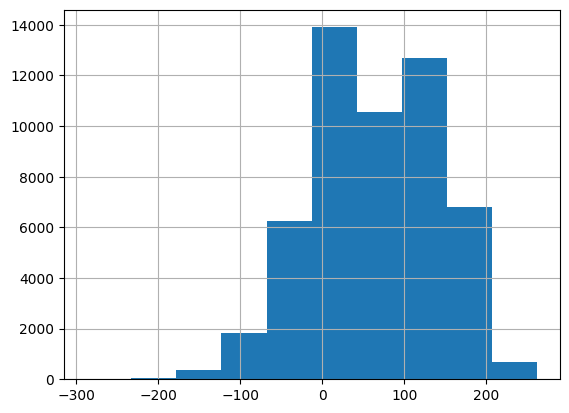

In [94]:
df['TG_CLEANED'].hist()

The figsize, 20 = the length (horizontal) and 5 = the height of the plot

<Axes: xlabel='    DATE'>

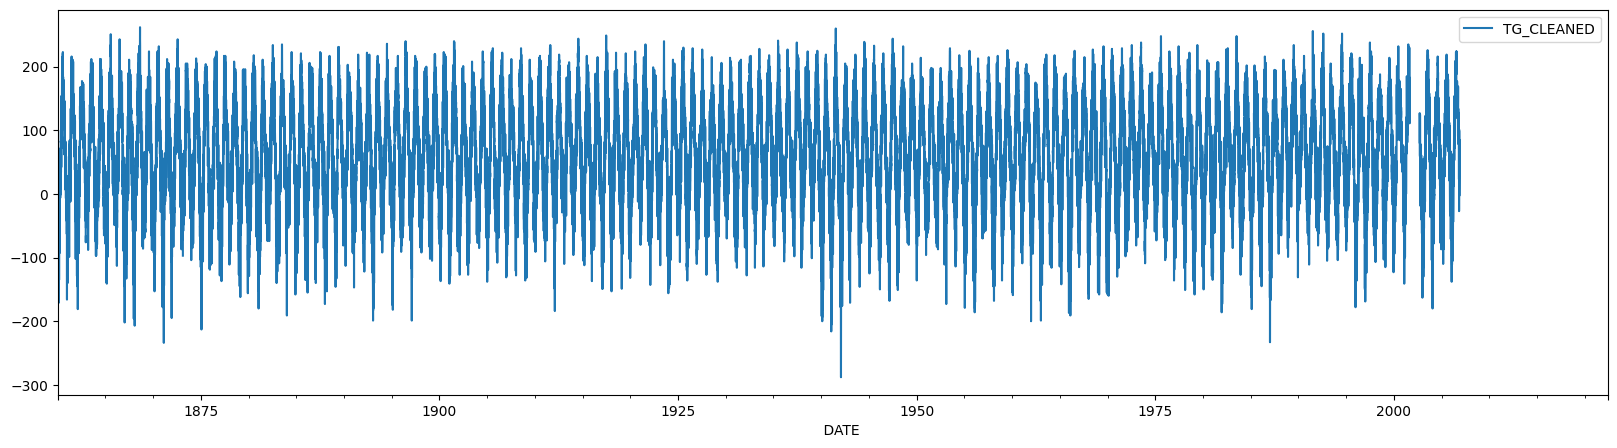

In [100]:
df.plot(x='    DATE', y='TG_CLEANED', figsize=(20,5))

To plot certain rows only, row 1 - 1000

<Axes: xlabel='    DATE'>

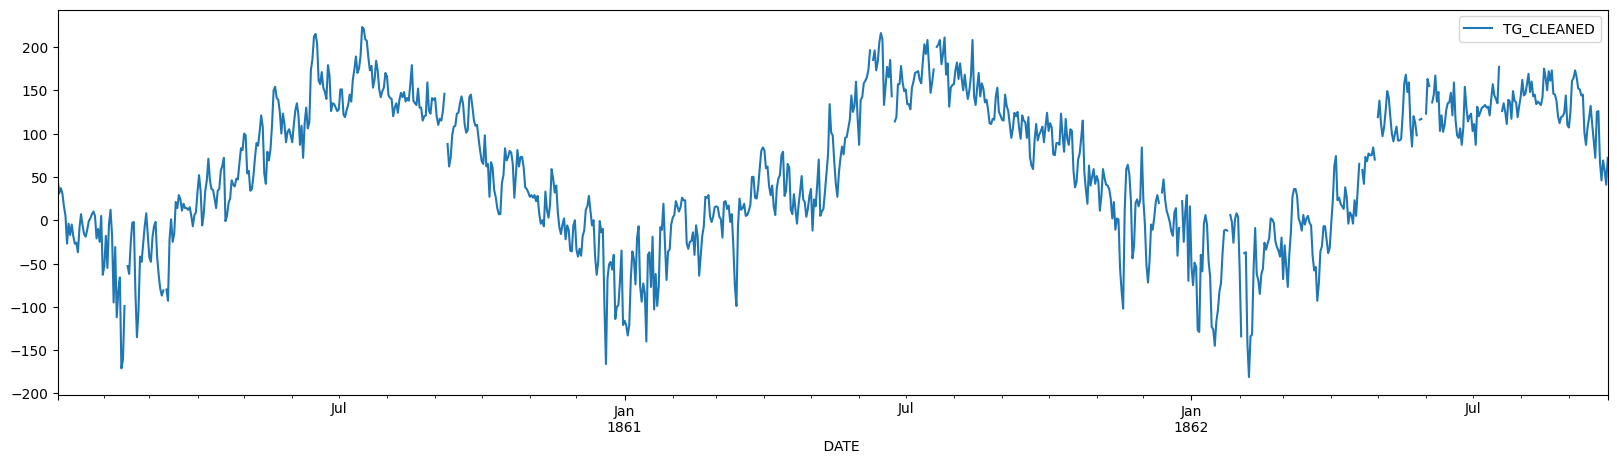

In [104]:
df[1:1000].plot(x='    DATE', y='TG_CLEANED', figsize=(20,5))